In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string

In [2]:
# Ensure you have the required NLTK packages
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKSHTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AKSHTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Load your dataset
df = pd.read_csv('C:\\Users\\AKSHTA\\Downloads\\Instagram-datasets.csv')

In [4]:
df.head()

,url,comment_user,comment_user_url,comment_date,comment,likes_number,replies_number,replies,hashtag_comment,tagged_users_in_comment,post_url,post_user,comment_id,post_id
0,https://www.instagram.com/badespi_,fab███vf,https://www.instagram.com/fabiacvf,2024-11-13T20:01:57.000Z,👏👏👏,1,1,"[{""likes_number"":1,""reply"":""@fabiacvf 👏👏👏"",""re...",NaN,NaN,https://www.instagram.com/p/DCUcCAHvEli,bad███i_,17950283516855389,3500546093244762466
1,https://www.instagram.com/badespi_,des███opi███,https://www.instagram.com/destinopiaui,2024-11-13T17:11:39.000Z,😍😍😍,1,1,"[{""likes_number"":0,""reply"":""@destinopiaui 😍👏👏""...",NaN,NaN,https://www.instagram.com/p/DCUcCAHvEli,bad███i_,17898726269997612,3500546093244762466
2,https://www.instagram.com/cojuvpiaui,mar███osb███,https://www.instagram.com/marciaosb16,2024-11-13T23:00:46.000Z,Meu querido @euwanderson7 que foi nosso dele...,1,1,"[{""likes_number"":0,""reply"":""@marciaosb16 ❤️🫶🥰""...",NaN,"[""@eu███der███7""]",https://www.instagram.com/p/DCT93_2p7bG,coj███iau███,18061924726802006,3500413464368101062
3,https://www.instagram.com/gamilpiaui,tic███cau███,https://www.instagram.com/ticimacauff,2024-11-14T00:16:19.000Z,"Com o professor Matheus Carvalho, realmente s...",3,1,"[{""likes_number"":0,""reply"":""👏👏🤝🤝"",""reply_date""...",NaN,NaN,https://www.instagram.com/p/DCUhYQ4Pn2y,gam███iau███,17911720779035231,3500569613299514802
4,https://www.instagram.com/agespisa.oficial,bru███nca███cao███,https://www.instagram.com/brunoencarnacao,2024-11-14T17:33:11.000Z,@rafael.fonteles todo ano é isso. O único muni...,1,1,"[{""likes_number"":1,""reply"":""Nós não merecemos ...",NaN,"[""@ra███l""]",https://www.instagram.com/p/DCRWettOTUB,age███sa.███cia███,18023025227618405,3499677253128238337


In [5]:
# Data Preprocessing

# Convert text to lowercase
df['comment'] = df['comment'].str.lower()

In [6]:
# Remove punctuation
def remove_punctuation(text):
    return "".join([char for char in text if char not in string.punctuation])

df['comment'] = df['comment'].apply(remove_punctuation)

In [7]:
# Remove stopwords
stop_words = set(stopwords.words('english'))

In [8]:
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df['comment'] = df['comment'].apply(remove_stopwords)

In [9]:
# Sentiment Analysis with TextBlob
def get_sentiment(text):
    # Perform sentiment analysis using TextBlob
    analysis = TextBlob(text)
    # Polarity is between -1 (negative) and 1 (positive)
    return analysis.sentiment.polarity

In [10]:
# Apply the sentiment function to the comments
df['sentiment_polarity'] = df['comment'].apply(get_sentiment)

In [11]:
# Classify the sentiment into Positive, Negative, or Neutral
df['Sentiment'] = df['sentiment_polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [12]:
# Check the distribution of sentiment
print(df['Sentiment'].value_counts())

Sentiment
Neutral     696
Positive    280
Negative     24
Name: count, dtype: int64


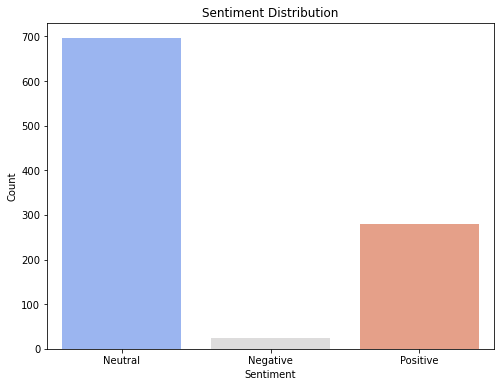

In [13]:
# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [14]:
# Sentiment Trend Over Time (by comment date)
# Ensure 'comment_date' column is in datetime format
df['comment_date'] = pd.to_datetime(df['comment_date'])

In [15]:
# Group by date and calculate the average sentiment polarity
daily_sentiment = df.groupby(df['comment_date'].dt.date)['sentiment_polarity'].mean()

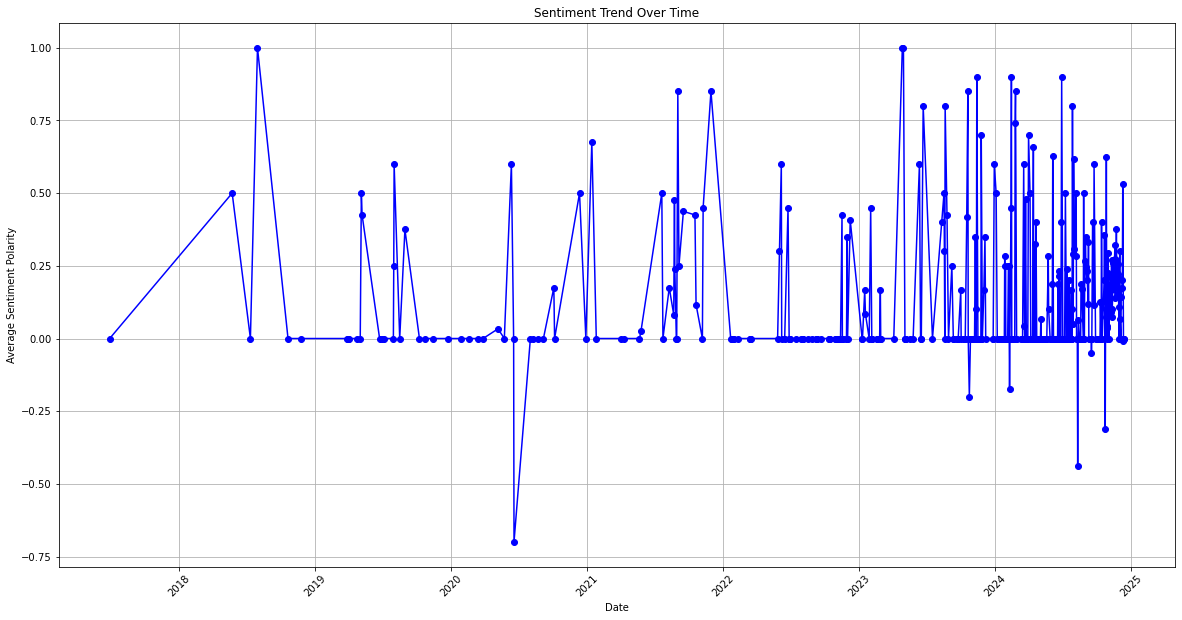

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(daily_sentiment.index.to_list(), daily_sentiment.values, marker='o', linestyle='-', color='b')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()